In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/song-popularity/dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,RadiusNeighborsClassifier
from sklearn.decomposition import PCA,TruncatedSVD

In [3]:
data = pd.read_csv('/kaggle/input/song-popularity/dataset.csv')

In [4]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
data['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

In [7]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

**Уберу дубликаты**

In [10]:
print('Дубликаты: ', data.duplicated().sum())

Дубликаты:  450


In [11]:
data = data.drop_duplicates().reset_index(drop=True)
print('Дубликаты: ', data.duplicated().sum())

Дубликаты:  0


**Разделение на категориальные и численные признаки**

In [12]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Распределение популярности треков

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


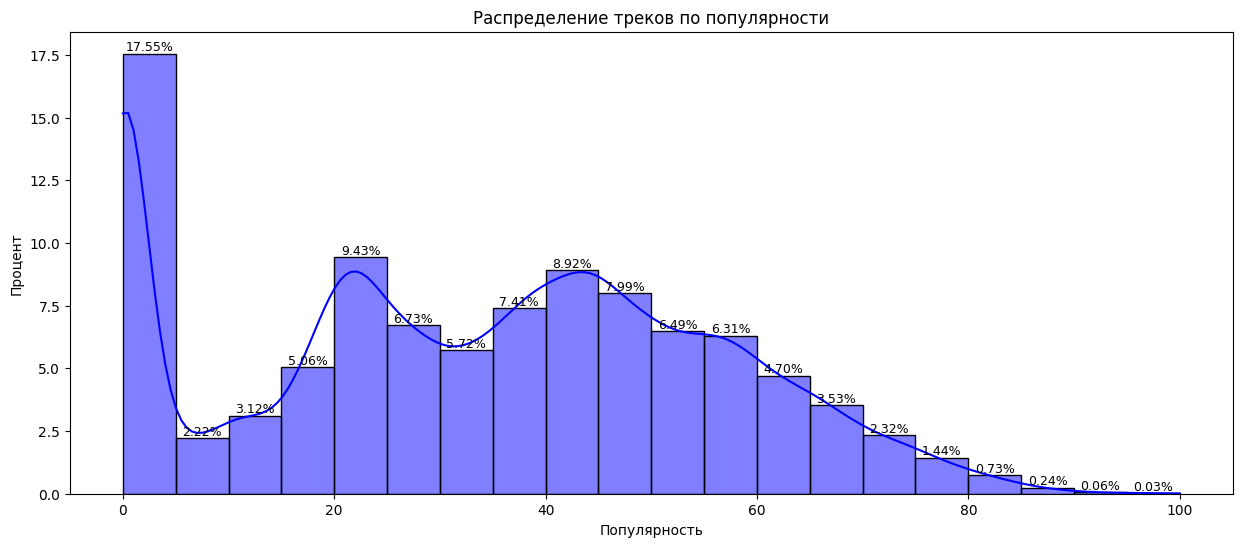

In [13]:
plt.figure(figsize=(15, 6))
histplot = sns.histplot(data['popularity'], bins=20, kde=True, color='blue', stat='percent')
plt.title('Распределение треков по популярности')
plt.xlabel('Популярность')
plt.ylabel('Процент')

for popular in histplot.patches:
    height = popular.get_height()
    if height > 0:
        plt.text(popular.get_x() + popular.get_width() / 2, height, f'{height:.2f}%', 
                ha='center', va='bottom', fontsize=9, color='black')
plt.show()
        

Есть очень много треков с нулевой популярностью.
В среднем популярность от 20 до 60.
От 80 уже идёт меньше процента.

# Треки explicit (нормативная и ненормативная лексика)

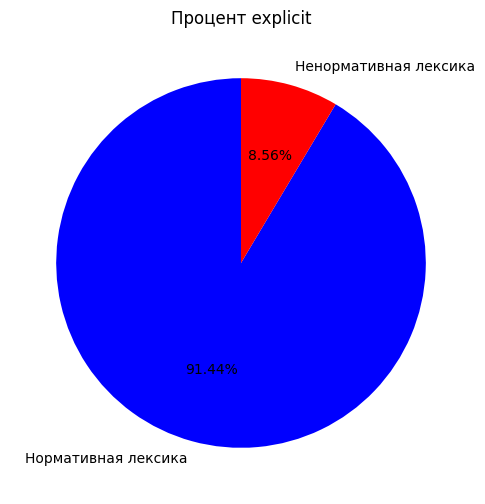

In [14]:
plt.figure(figsize=(6, 6))
plt.pie(data['explicit'].value_counts(), labels=['Нормативная лексика', 'Ненормативная лексика'],
       autopct='%.2f%%', startangle=90, colors=['blue', 'red'])
plt.title('Процент explicit')
plt.show()

Видно, что треков без explicit больше

# Как explicit может влиять на популярность?

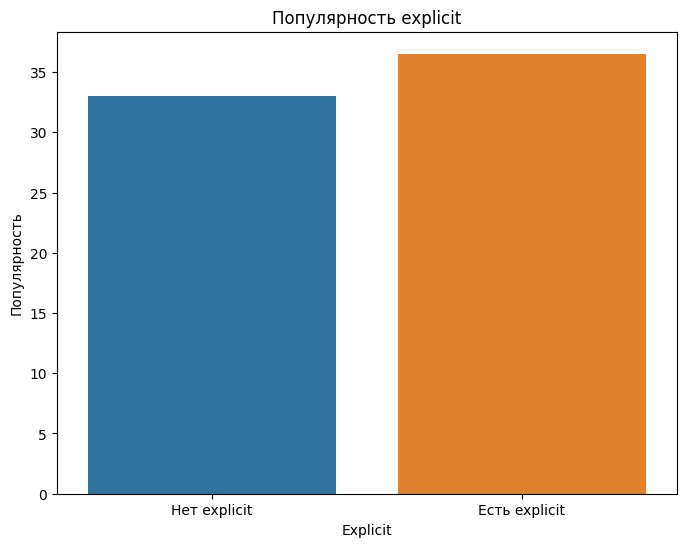

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data.groupby('explicit')['popularity'].mean().reset_index(), 
           x='explicit', y='popularity')
plt.title('Популярность explicit')
plt.xlabel('Explicit')
plt.ylabel('Популярность')
plt.xticks([0, 1], labels=['Нет explicit', 'Есть explicit'])
plt.show()

Видно, что если explicit присутствует, то треки популярнее, но не намного.

# Как влияет длительность трека на его популярность?

/tmp/ipykernel_24/3505439649.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_pop = data.groupby('duration_category')['popularity'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


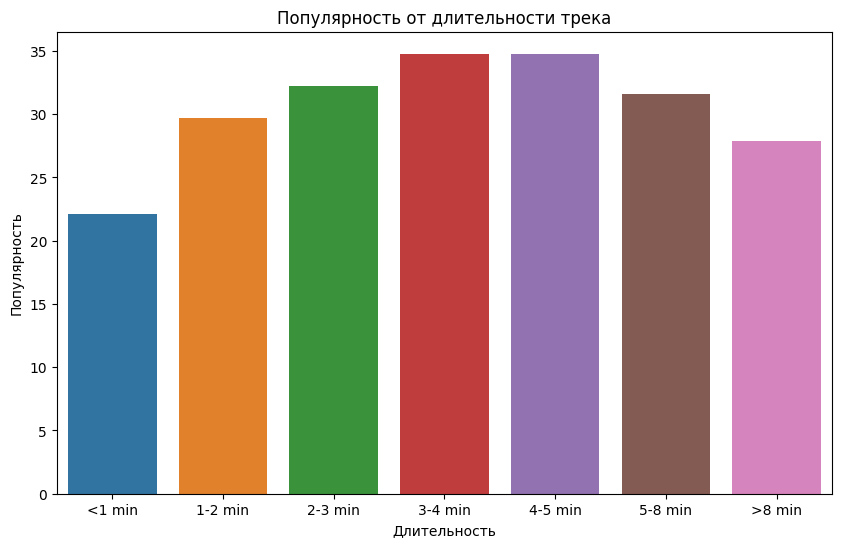

In [16]:
duration = data['duration_ms'] / 60000 # Пусть для удобства будет в минутах
bins = [0, 1, 2, 3, 4, 5, 8, duration.max()]
labels = ['<1 min', '1-2 min', '2-3 min', '3-4 min', '4-5 min', '5-8 min', '>8 min']
data['duration_category'] = pd.cut(duration, bins=bins, labels=labels)
duration_pop = data.groupby('duration_category')['popularity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=duration_pop, x='duration_category', y='popularity')
plt.title('Популярность от длительности трека')
plt.xlabel('Длительность')
plt.ylabel('Популярность')
plt.show()

Самые популярные треки длятся 3-5 минут. На моё удивление, самые непопулярные треки те, которые меньше минуты, а не которые больше 8-ми минут.

# Как влияют жанры на популярность треков?

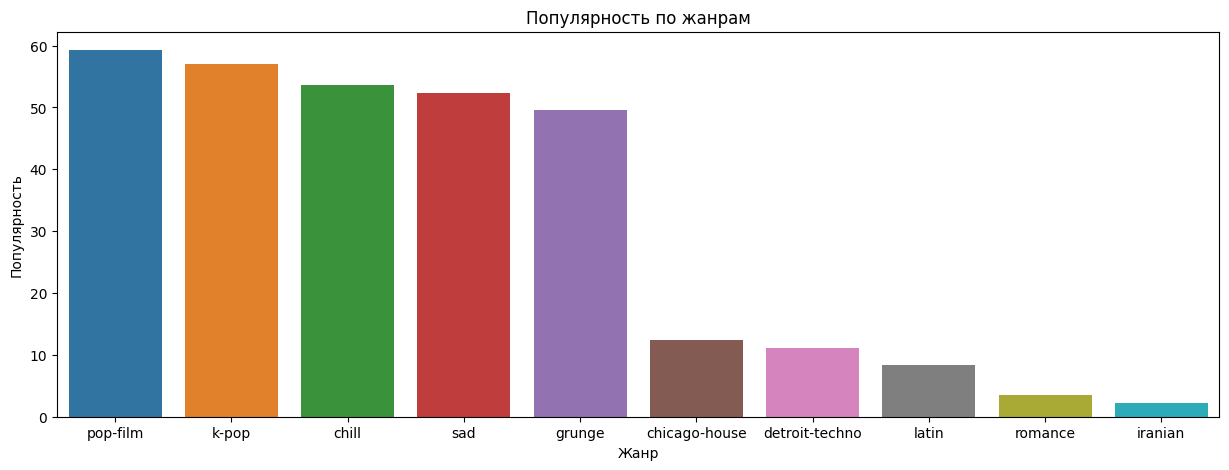

In [17]:
genre_pop = data.groupby('track_genre')['popularity'].mean().reset_index()
genre_pop = genre_pop.sort_values(by='popularity', ascending=False)
top_genres = genre_pop.head(5)
bot_genres = genre_pop.tail(5)
genres = pd.concat([top_genres, bot_genres])

plt.figure(figsize=(15, 5))
sns.barplot(data=genres, x='track_genre', y='popularity')
plt.title('Популярность по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Популярность')
plt.show()

Популярные жанры:
1. pop-film
2. k-pop
3. chill
4. sad
5. grunge


Непопулярные:
1. chicago-house
2. detroit-techno
3. latin
4. romance
5. iranian

Как итог (что вполне ожидаемо): жанр безусловно влияет на популярность треков

# Как valence(настроение) влияет на популярность треков?

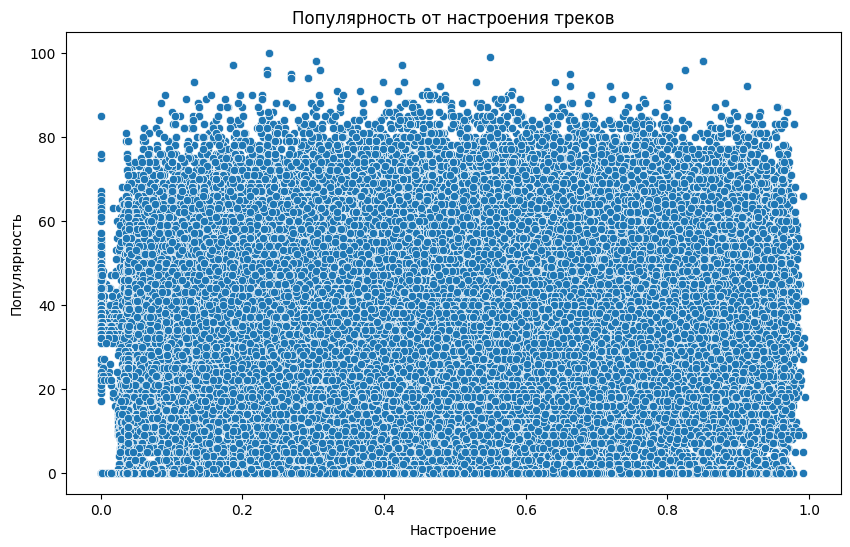

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='popularity', data=data)
plt.title('Популярность от настроения треков')
plt.xlabel('Настроение')
plt.ylabel('Популярность')
plt.show()

График показывает то, что настроение треков не особо сильно влияет на популярность, но грустные треки чуть популярнее, чем остальные.

# Как влияет энергичность и танцевальность треков на их популярность?

/tmp/ipykernel_24/4210811377.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = data.groupby(['dance_bin', 'energy_bin']).popularity.mean().reset_index()


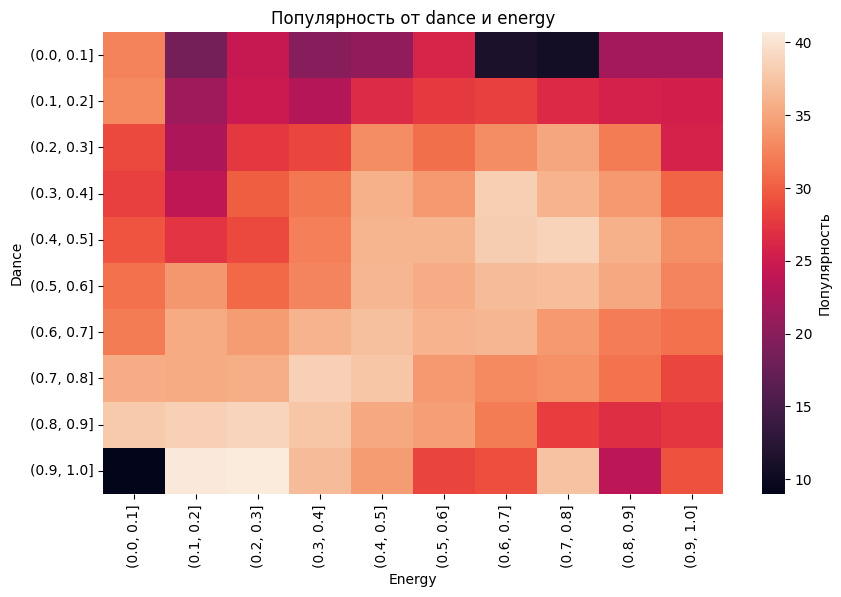

In [19]:
data['dance_bin'] = pd.cut(data['danceability'], bins = np.arange(0, 1.1, 0.1))
data['energy_bin'] = pd.cut(data['energy'], bins = np.arange(0, 1.1, 0.1))
heatmap_data = data.groupby(['dance_bin', 'energy_bin']).popularity.mean().reset_index()
heatmap_pivot = heatmap_data.pivot(index='dance_bin', columns='energy_bin', values='popularity')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_pivot, cbar=True, cbar_kws={'label': 'Популярность'})
plt.title('Популярность от dance и energy')
plt.xlabel('Energy')
plt.ylabel('Dance')
plt.show()

На карте видно, что популярность зависит от танцевальности и энергичности. В среднем наибольшая популярность от энергичности от 0.1 до 0.3, а у танцевальности 0.3 до 0.5. Минимальная у них по танцевальности: от 0 до 0.1, а энергичность: от 0.6 до 0.8.

# Взаимосвязь между аудиофункциями

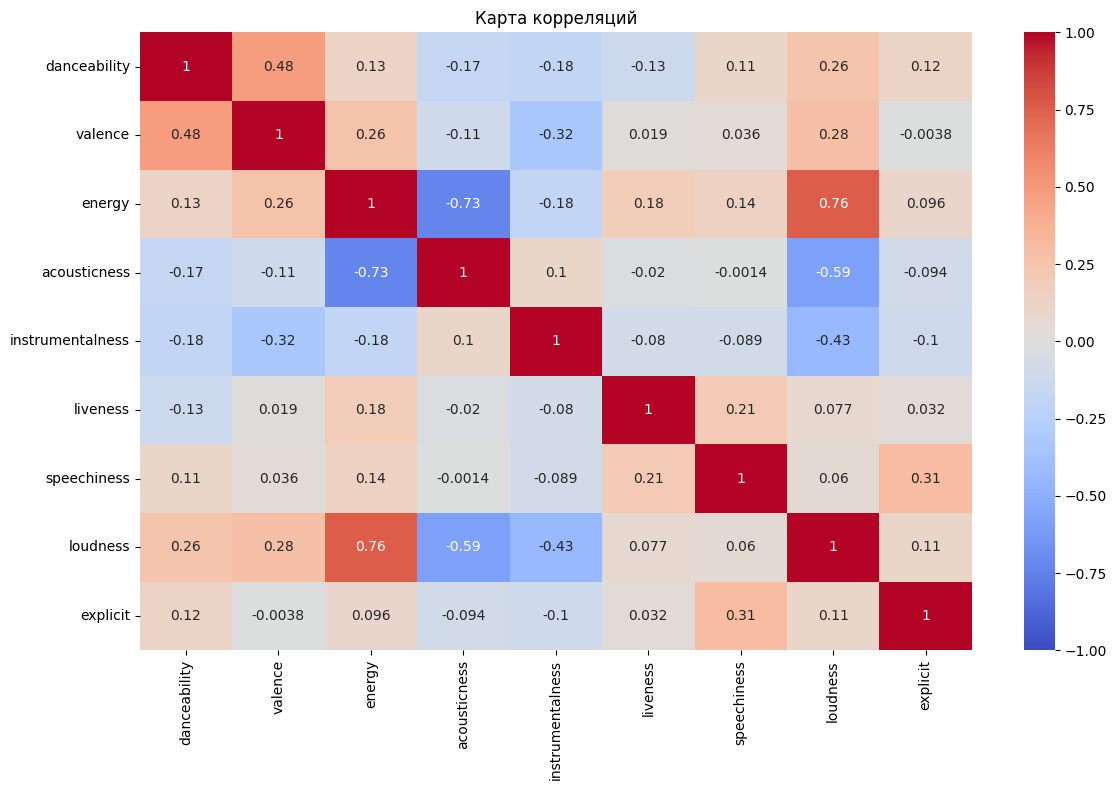

In [20]:
plt.figure(figsize = (12, 8))
corr = data[['danceability','valence', 'energy', 'acousticness', 'instrumentalness','liveness', 'speechiness', 'loudness', 'explicit']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin =- 1, vmax = 1)
plt.title('Карта корреляций')
plt.tight_layout()
plt.show()

**Карта показывает, что скоррелированных переменных немного(говорю про сильную корреляцию), настроение коррелирует с энергичностью и танцевальностью(вполне логично и очевидно), также коррелируют живость и красноречивость, акустические треки менее энергичные(что также логично). Loudness и energy с высокой корреляцией, значит энергичные треки довольно громкие. Высокая корреляция у красноречивости и explicit, т.е. в треках с большим кол-вом слов и рифм (по типу репа) скорее всего присутствует ненормативная лексика. Акустические и инструментальные треки довольно тихие.**

# Работа с признаками

**Перевожу треки в минуты для удобства**

In [21]:
import math
duration = data['duration_ms'] / 60000
bins = [0, 1, 2, 3, 4, 5, 8, duration.max()]
labels = ['<1 min', '1-2 min', '2-3 min', '3-4 min', '4-5 min', '5-8 min', '>8 min']
duration_category = pd.cut(duration, bins=bins, labels=labels, include_lowest=True)

**Объединю некоторые признаки**

In [22]:
data['energy_dance'] = data['energy'] * data['danceability']
data['valence_dance'] = data['energy'] * data['danceability']
data['loud_energy'] = data['loudness'] * data['energy']

**Разделю темп на отдельные категории**

In [23]:
bins = [0, 40, 80, 120, 160, 220, data['tempo'].max()]
labels = ['0-40 bpm', '40-80 bpm', '80-120 bpm', '120-160 bpm', '160-220 bpm', '>220 bpm']
tempo_category = pd.cut(data['tempo'], bins=bins, labels=labels, include_lowest=True)

**Изменение типов данных**

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113549 entries, 0 to 113548
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   track_id           113549 non-null  object  
 1   artists            113549 non-null  object  
 2   album_name         113549 non-null  object  
 3   track_name         113549 non-null  object  
 4   popularity         113549 non-null  int64   
 5   duration_ms        113549 non-null  int64   
 6   explicit           113549 non-null  bool    
 7   danceability       113549 non-null  float64 
 8   energy             113549 non-null  float64 
 9   key                113549 non-null  int64   
 10  loudness           113549 non-null  float64 
 11  mode               113549 non-null  int64   
 12  speechiness        113549 non-null  float64 
 13  acousticness       113549 non-null  float64 
 14  instrumentalness   113549 non-null  float64 
 15  liveness           113549 non-null

In [25]:
# Получаю индекс последнего валидного столбца перед duration_category
last_valid_column = data.columns.get_loc('duration_category') - 1
# Создаю список столбцов для удаления
columns_to_drop = [
    'track_id',
    'artists',
    'album_name',
    'track_name',
    'track_genre'
] + list(data.columns[last_valid_column+1:])
# Удаляю указанные столбцы
data = data.drop(columns=columns_to_drop)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113549 entries, 0 to 113548
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113549 non-null  int64  
 1   duration_ms       113549 non-null  int64  
 2   explicit          113549 non-null  bool   
 3   danceability      113549 non-null  float64
 4   energy            113549 non-null  float64
 5   key               113549 non-null  int64  
 6   loudness          113549 non-null  float64
 7   mode              113549 non-null  int64  
 8   speechiness       113549 non-null  float64
 9   acousticness      113549 non-null  float64
 10  instrumentalness  113549 non-null  float64
 11  liveness          113549 non-null  float64
 12  valence           113549 non-null  float64
 13  tempo             113549 non-null  float64
 14  time_signature    113549 non-null  int64  
dtypes: bool(1), float64(9), int64(5)
memory usage: 12.2 MB


# Обучение

In [27]:
# Разделение данных на обучающую и тестовую выборки
X = data.drop(columns=['popularity'])
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Модель

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2271/2271 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 636.5554 - val_loss: 481.4398
Epoch 2/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 476.7435 - val_loss: 475.1586
Epoch 3/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 463.3734 - val_loss: 463.9171
Epoch 4/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 458.9760 - val_loss: 464.6655
Epoch 5/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 455.4869 - val_loss: 458.6481
Epoch 6/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 450.4127 - val_loss: 457.2388
Epoch 7/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 444.1945 - val_loss: 455.5875
Epoch 8/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 443.6427 - val_loss: 454.4454
Epoch 9/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 443.8820 - val_loss: 455.1026
Epoch 10/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 443.8764 - val_loss: 449.9990
Epoch 11/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 440.4729 - val_loss: 454.02

In [30]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 16.93
MSE: 438.48
RMSE: 20.94
R2: 0.13
MAPE: 18434754610180352.00%


1) MAE(Средняя абсолютная ошибка) - чем меньше значение, тем более точная модель (0 - самое точное)
2) MSE(Среднеквадратичная ошибка) - точно также: чем меньше, тем лучше
3) RMSE(Корень MSE) - чем меньше, тем лучше. Сам корень(в отличии от MSE) возвращает ошибку обратно в измерение исходных данных.
4) R2(Коэффициент детерминации) - варьируется между 0 и 1, чем меньше, тем хуже
5) MAPE(Средняя абсолютная процентная ошибка) - чем меньше, тем точнее. Почему же такой "страшный" результат? MAPE при работе с высокими значениями или нулями оказывается бесполезным, потому что показывает странные результаты(как у меня).

**Построим график модели**

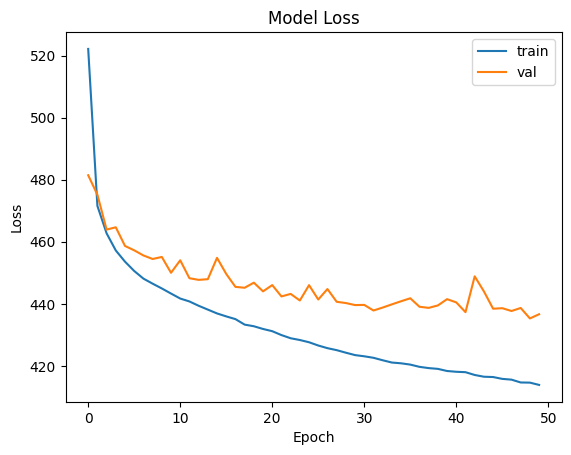

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

**Модель переобучается, т.к. train сильнее уменьшается, чем val.**

***Кросс-валидация*** 

710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
710/710 ━━━━━━━━

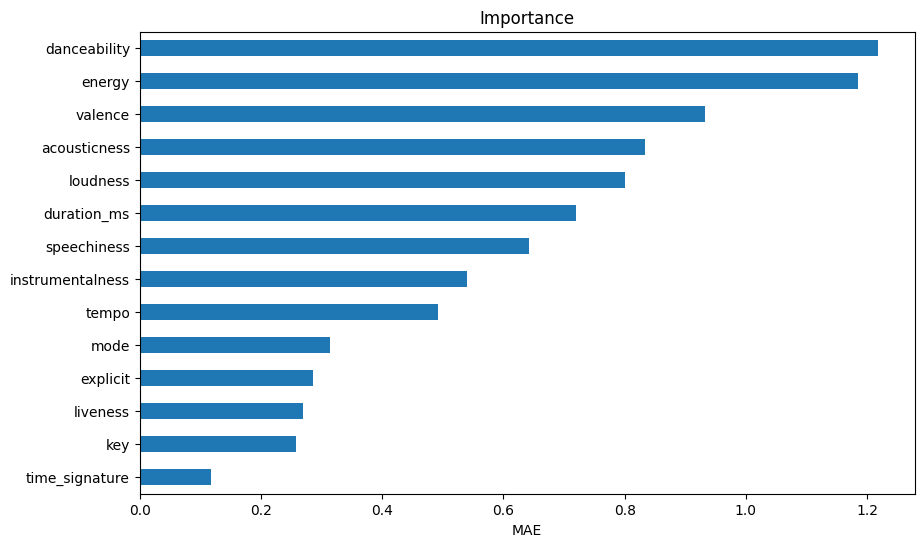

In [32]:
from sklearn.inspection import permutation_importance
res = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importance = pd.Series(res.importances_mean, index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Importance')
plt.xlabel('MAE')
plt.show()

**Самыми важными признаками оказались: танцевальность и энергичность трека**

# Линейная регрессия

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [34]:
def create_linear_regression():
    linear_reg = LinearRegression()
    return linear_reg
linear_reg = create_linear_regression()

linear_reg.fit(X_train, y_train)

LinearRegression()

In [35]:
# Прогнозирование на тестовой выборке
y_pred = linear_reg.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 18.48
MSE: 488.26
RMSE: 22.10
R2: 0.03
MAPE: 21568897961574588.00%


***Кросс-валидация***

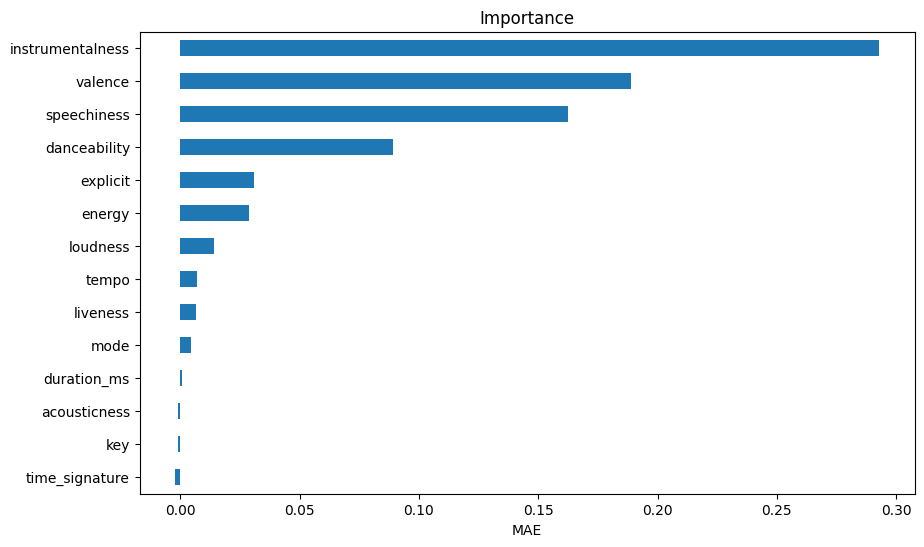

In [36]:
res = permutation_importance(linear_reg, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importance = pd.Series(res.importances_mean, index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Importance')
plt.xlabel('MAE')
plt.show()

**Важными считаются: инструментальность и настроение.**

# Лес случайностей(Random forest)

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
def random_forest():
    random_forest = RandomForestRegressor(random_state=42, max_depth=14, min_samples_leaf=1,
                                         min_samples_split=2, n_estimators=14)
    return random_forest
random_forest = random_forest()

random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=14, random_state=42)

*Тестировал различные параметры и по итогу оставил лучшие: 14, 14, 42*

In [39]:
# Прогнозирование на тестовой выборке
y_pred = random_forest.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 15.26
MSE: 360.38
RMSE: 18.98
R2: 0.28
MAPE: 15335074038043306.00%


***Кросс-валидация***

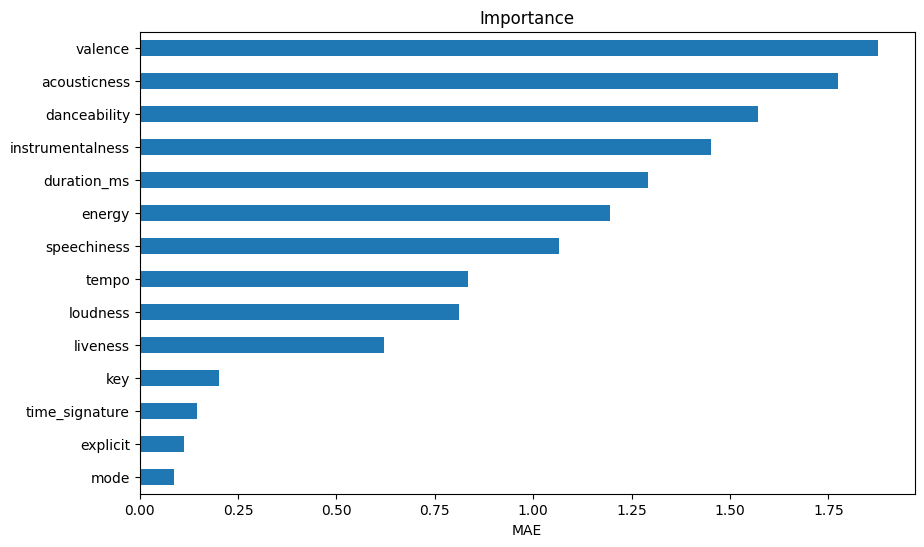

In [40]:
res = permutation_importance(random_forest, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importance = pd.Series(res.importances_mean, index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Importance')
plt.xlabel('MAE')
plt.show()

**Важными считаются: настроение, акустика и танцевальность.**

# Вывод

1) Обычная модель показала следующие результаты:
MAE: 16.93
MSE: 438.48
RMSE: 20.94
R2: 0.13
MAPE: 18434754610180352.00%.00%434754610180352.00%.00%.00%

2) Линейная регрессия:
MAE: 18.48
MSE: 488.26
RMSE: 22.10
R2: 0.03
MAPE: 21568897961574588.00%

3) Лес случайностей:
MAE: 15.26
MSE: 360.38
RMSE: 18.98
R2: 0.28
MAPE: 15335074038043306.00%

**Итог**: лучшей моделью оказалась **Random forest**, показав самые точные результаты кросс-валидации. Самой худшей оказалась **Linear Regression**. В ходе работы я смог рассмотреть популярность треков Spotify, узнать (где-то убедиться) какие признаки могут влиять на популярность треков, смог построить графики, которые до этого ещё не строил (например, scatterplot), обучил модели и оценил их эффективность.